In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cls_boosting import BoostingClassifier  # make sure cls_boosting.py is in the same folder

def plot_decision_boundary(model, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, zz, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


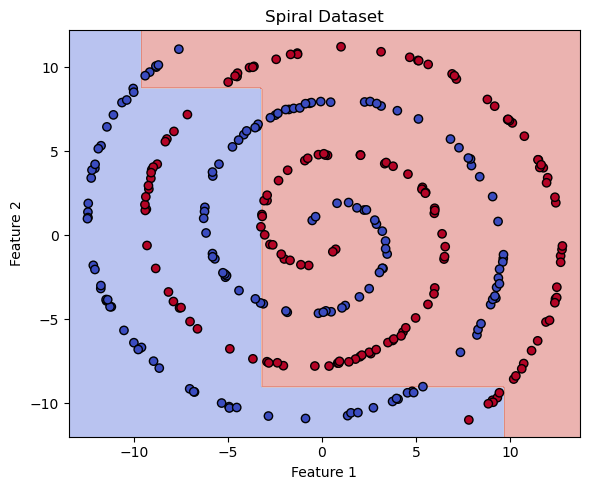

In [2]:
#Spiral Dataset
def generate_spiral_data(n_samples=150, noise=0.2):
    np.random.seed(42)
    n = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2 * np.pi / 360)
    d1x = -np.cos(n) * n + np.random.rand(n_samples, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_samples, 1) * noise
    X1 = np.hstack((d1x, d1y))
    y1 = np.zeros(n_samples)
    d2x = np.cos(n) * n + np.random.rand(n_samples, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_samples, 1) * noise
    X2 = np.hstack((d2x, d2y))
    y2 = np.ones(n_samples)
    return np.vstack((X1, X2)), np.hstack((y1, y2)).astype(int)

X, y = generate_spiral_data()
model = BoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Spiral Dataset")


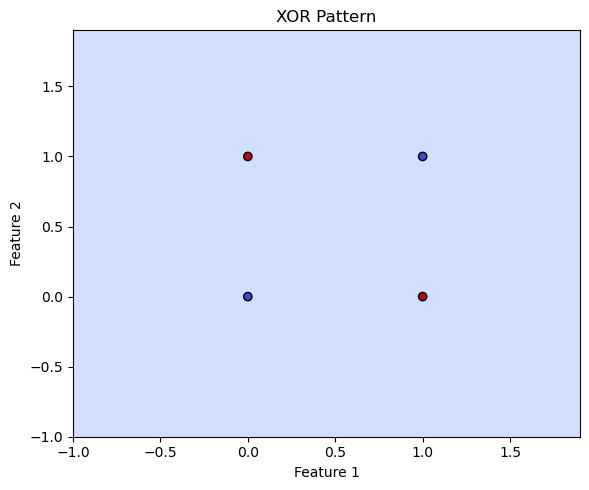

In [3]:
#XOR Pattern
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])
model = BoostingClassifier(n_estimators=50, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "XOR Pattern")


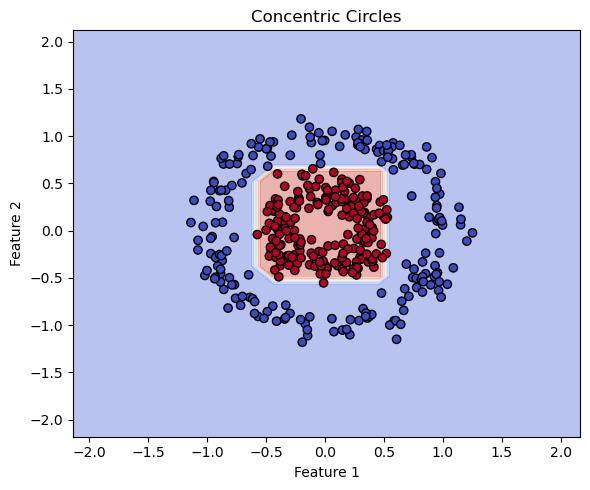

In [4]:
#Concentric Circles
def generate_circles(n=200, noise=0.1, factor=0.4):
    t = 2 * np.pi * np.random.rand(n)
    outer = np.stack([np.cos(t), np.sin(t)], axis=1) + noise * np.random.randn(n, 2)
    inner = factor * np.stack([np.cos(t), np.sin(t)], axis=1) + noise * np.random.randn(n, 2)
    X = np.vstack([outer, inner])
    y = np.array([0]*n + [1]*n)
    return X, y

X, y = generate_circles()
model = BoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Concentric Circles")


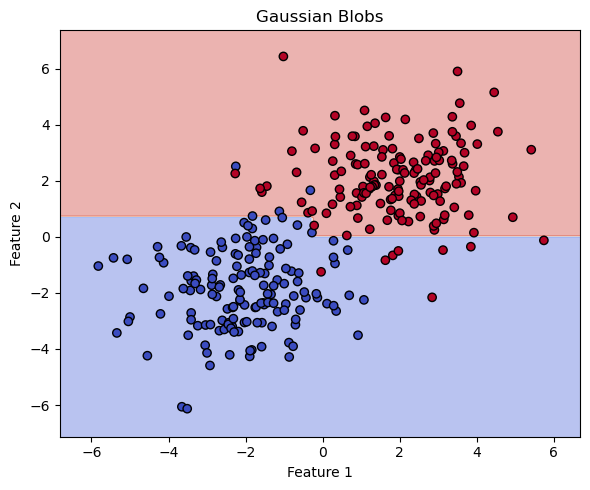

In [5]:
#Gaussian Blobs
def generate_blobs(n=150, std=2.0):
    mean0 = np.array([-2, -2])
    mean1 = np.array([2, 2])
    cov = np.eye(2) * std
    X0 = np.random.multivariate_normal(mean0, cov, n)
    X1 = np.random.multivariate_normal(mean1, cov, n)
    X = np.vstack((X0, X1))
    y = np.array([0]*n + [1]*n)
    return X, y

X, y = generate_blobs()
model = BoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Gaussian Blobs")


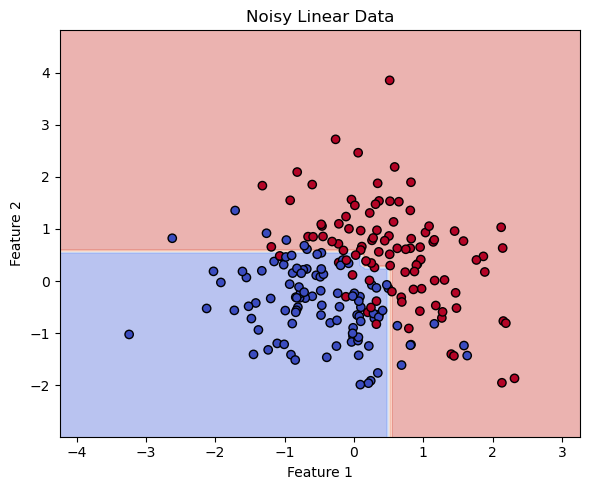

In [6]:
#Noisy Linear
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] + 0.5 * np.random.randn(200) > 0).astype(int)
model = BoostingClassifier(n_estimators=30, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Noisy Linear Data")


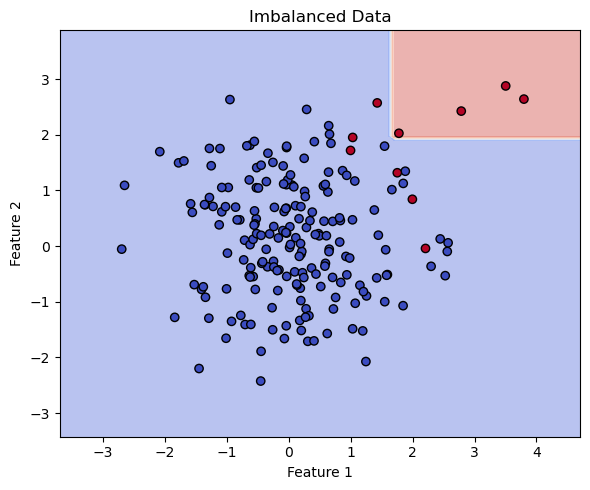

In [7]:
#Imbalanced Data
X_majority = np.random.randn(190, 2)
y_majority = np.zeros(190)
X_minority = np.random.randn(10, 2) + 2
y_minority = np.ones(10)

X = np.vstack((X_majority, X_minority))
y = np.hstack((y_majority, y_minority))

model = BoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Imbalanced Data")


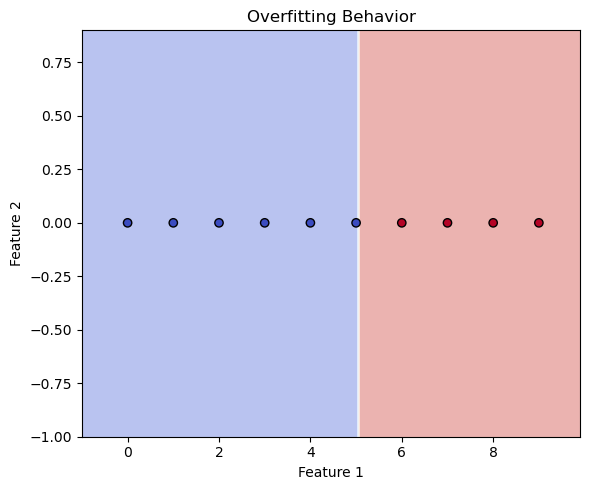

In [8]:
#Overfitting Behavior
X = np.array([[i, 0] for i in range(10)])
y = np.array([1 if i > 5 else 0 for i in range(10)])

model = BoostingClassifier(n_estimators=200)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Overfitting Behavior")


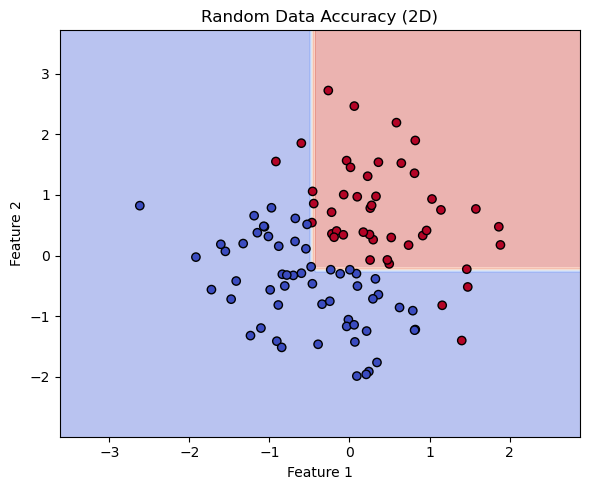

In [9]:
#Random Data Accuracy
np.random.seed(42)
X = np.random.randn(100, 2)  # use 2D instead of 5D for plotting
y = (X[:, 0] + X[:, 1] > 0).astype(int)

model = BoostingClassifier(n_estimators=30)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Random Data Accuracy (2D)")


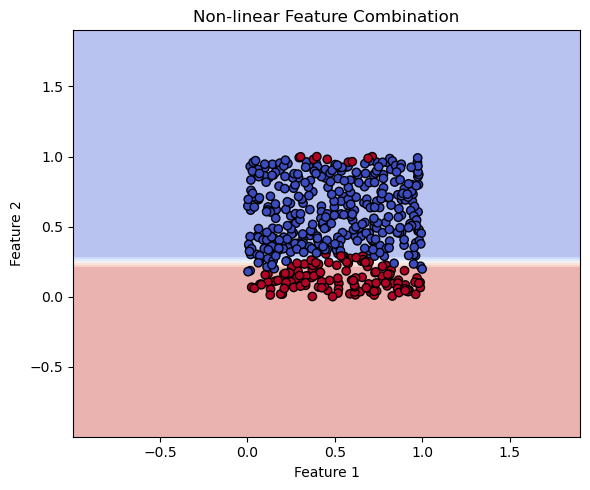

In [10]:
#Non-linear Feature Combination
np.random.seed(0)
X = np.random.rand(500, 2)
y = (np.sin(3 * X[:, 0]) + np.cos(5 * X[:, 1]) > 1).astype(int)

model = BoostingClassifier(n_estimators=100)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Non-linear Feature Combination")


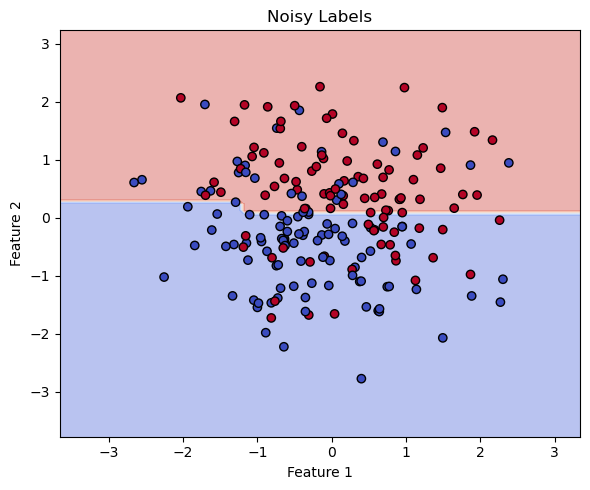

In [11]:
# Noisy Labels
np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

flip_idx = np.random.choice(len(y), size=40, replace=False)
y[flip_idx] = 1 - y[flip_idx]

model = BoostingClassifier(n_estimators=100)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Noisy Labels")


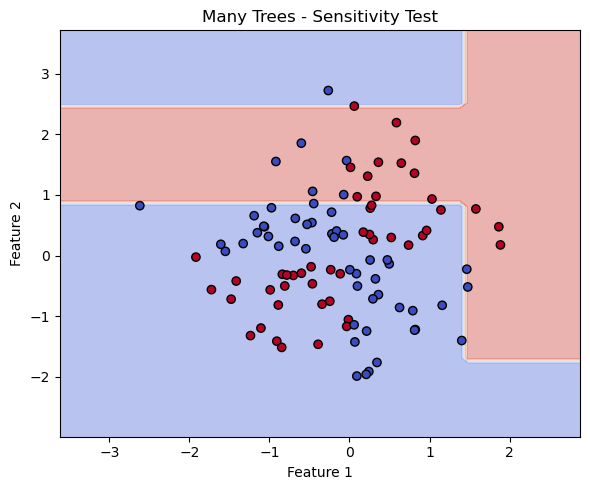

In [12]:
#Tree Quantity Sensitivity (Many Trees)
np.random.seed(42)
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int)

model = BoostingClassifier(n_estimators=100)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Many Trees - Sensitivity Test")


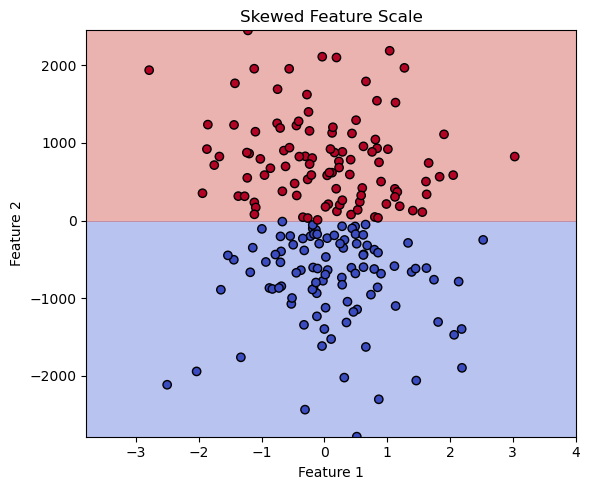

In [13]:
# Skewed Feature Scale
np.random.seed(1)
X = np.random.randn(200, 2)
X[:, 1] *= 1000  # scale one feature drastically
y = (X[:, 0] + X[:, 1] > 0).astype(int)

model = BoostingClassifier(n_estimators=50)
model.fit(X, y)
plot_decision_boundary(model, X, y, "Skewed Feature Scale")


In [14]:
# Cell 1: Imports and Classifier Setup
import numpy as np
import matplotlib.pyplot as plt
from cls_boosting import BoostingClassifier  # Ensure cls_boosting.py is in the same folder

def plot_decision_boundary(model, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, zz, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


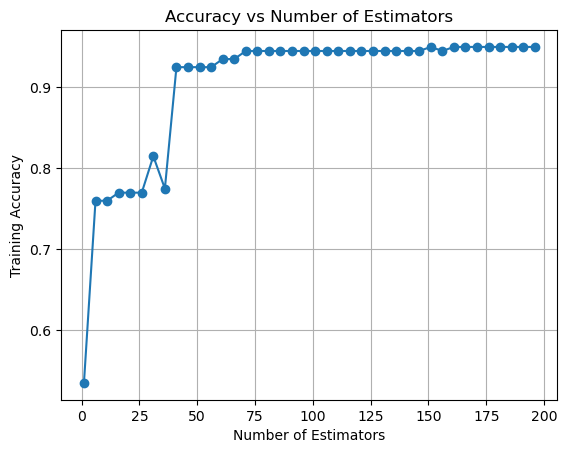

In [15]:
# Cell 2: Accuracy vs Number of Estimators
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

accuracies = []
trees = list(range(1, 201, 5))

for n in trees:
    model = BoostingClassifier(n_estimators=n, learning_rate=0.1)
    model.fit(X, y)
    acc = np.mean(model.predict(X) == y)
    accuracies.append(acc)

plt.plot(trees, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Training Accuracy")
plt.title("Accuracy vs Number of Estimators")
plt.grid(True)
plt.show()


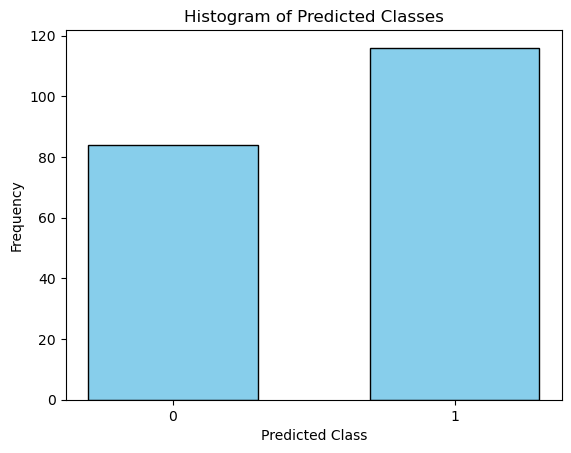

In [16]:
# Cell 3: Histogram of Predicted Classes
model = BoostingClassifier(n_estimators=100)
model.fit(X, y)
preds = model.predict(X)

plt.hist(preds, bins=np.arange(-0.5, 2), rwidth=0.6, align='mid',
         color='skyblue', edgecolor='black')
plt.xticks([0, 1])
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Classes")
plt.show()


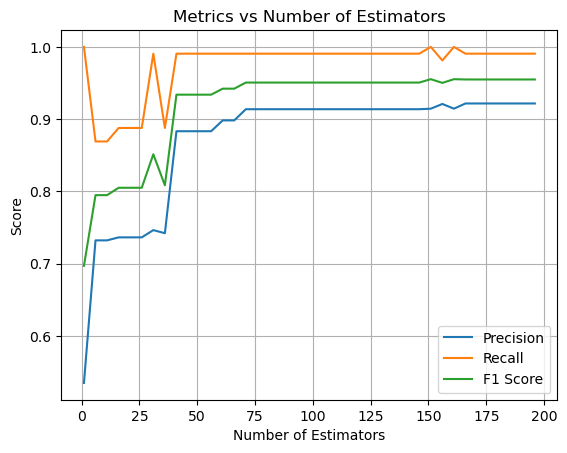

In [17]:
# Cell 4: Precision, Recall, F1 vs Estimators
def compute_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0
    return precision, recall, f1

precisions, recalls, f1s = [], [], []

for n in trees:
    model = BoostingClassifier(n_estimators=n)
    model.fit(X, y)
    preds = model.predict(X)
    p, r, f = compute_metrics(y, preds)
    precisions.append(p)
    recalls.append(r)
    f1s.append(f)

plt.plot(trees, precisions, label="Precision")
plt.plot(trees, recalls, label="Recall")
plt.plot(trees, f1s, label="F1 Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.title("Metrics vs Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()
